In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.utils import resample

from sklearn.model_selection import learning_curve,validation_curve
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,confusion_matrix,log_loss
import timeit

In [2]:
data = pd.read_csv('Dataset/adult.csv',header=None,names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'])
data = data[[col for col in data.columns if col != 'fnlwgt' and col != 'education-num']]
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','target']

In [4]:

labelencoder = LabelEncoder()
for col in categorical_features:
    data[col] = labelencoder.fit_transform(data[col])
    
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,9,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,2,4,0,4,1,0,0,13,39,0
2,38,4,11,0,6,1,4,1,0,0,40,39,0
3,53,4,1,2,6,0,2,1,0,0,40,39,0
4,28,4,9,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,2,13,5,4,0,0,0,38,39,0
32557,40,4,11,2,7,0,4,1,0,0,40,39,1
32558,58,4,11,6,1,4,4,0,0,0,40,39,0
32559,22,4,11,4,1,3,4,1,0,0,20,39,0


In [5]:
np.sum(data['target']==0)/32561

0.7591904425539756

In [6]:
df_majority = data[data.iloc[:,-1]==0]
df_minority = data[data.iloc[:,-1]==1]
df_minority.shape[0]

7841

In [7]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=df_minority.shape[0])
df_balanced = pd.concat([df_majority_downsampled,df_minority])

In [8]:
X = df_balanced[[col for col in data.columns if col != 'target']]
          
y = df_balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
X_train

# support vector machine

In [ ]:
# kernel optimization
kernel_function = ['linear','rbf']
fitting_time = {}
predict_time = {}
test_accuracy = {}
for i in kernel_function:
    clf = SVC(kernel = i, random_state = 10)
    start_time = timeit.default_timer()
    clf.fit(X_train,y_train)
    end_time = timeit.default_timer()
    fitting_time[i] = end_time-start_time
    
    start_time = timeit.default_timer()
    y_pred_test = clf.predict(X_test)
    end_time = timeit.default_timer()
    predict_time[i] = end_time-start_time
    
    test_accuracy[i] = accuracy_score(y_test,y_pred_test)

In [ ]:
kernel_optimization = pd.DataFrame({'fitting_time':fitting_time,'test_accuracy':test_accuracy})
ax = kernel_optimization.plot(kind='bar',secondary_y = 'test_accuracy',rot=0)
for container in ax.containers:
    ax.bar_label(container)

In [ ]:

#grid search on SVM with linear kernel 
Cs = [1e-4,1e-3,1e-2,0.1,1]
gammas = [0.1,1,10,100]
param_grid = {'C':Cs,'gamma':gammas}
clf = GridSearchCV(estimator = SVC(kernel = 'rbf',random_state = 10),param_grid = param_grid, cv =5, scoring = 'accuracy')
clf.fit(X_train,y_train)
print("best C for linear SVM:",clf.best_params_)


In [ ]:
pipeline = make_pipeline(StandardScaler(),SVC(random_state=1,gamma = 0.1, C = 1,kernel = 'rbf'))
train_score, test_score = validation_curve(SVC(random_state=1,gamma = 0.1, C = 1,kernel = 'rbf'), X_train,y_train,
                                       param_name = "C",
                                       param_range = Cs,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(Cs, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(Cs, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(Cs, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(Cs, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'right')
plt.show()

In [ ]:
train_score, test_score = validation_curve(SVC(random_state=1,gamma = 0.1, C = 1,kernel = 'rbf'), X_train,y_train,
                                       param_name = "gamma",
                                       param_range = gammas,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(gammas, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(gammas, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(gammas, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(gammas, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with SVM")
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'right')
plt.show()

## plot learning curve

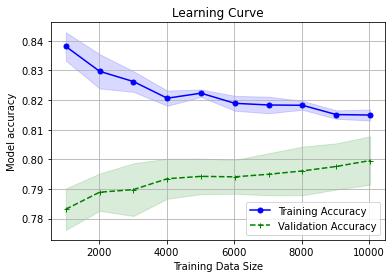

In [19]:
pipeline = make_pipeline(StandardScaler(),SVC(random_state=1,gamma = 0.1, C = 1,kernel = 'rbf'))

train_sizes, train_scores, valid_scores,fit_times,score_times = learning_curve(pipeline, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5,n_jobs=1,scoring = 'accuracy',return_times = True)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

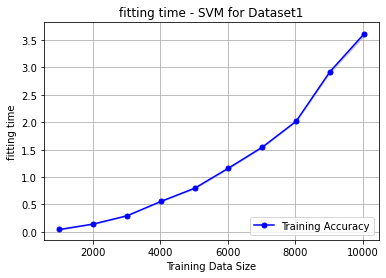

In [20]:
fit_time_avg =  np.mean(fit_times, axis=1)
fit_time_std =  np.std(fit_times, axis=1)

plt.plot(train_sizes, fit_time_avg , color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, fit_time_avg  + fit_time_std, fit_time_avg  - fit_time_std, alpha=0.15, color='blue')
plt.title('fitting time - SVM for Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('fitting time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [ ]:
param_grid = {
 
    'max_depth': np.arange(1, 40, 1),
    'ccp_alpha': [0.01,0.008, 0.006, 0.004, 0.003,0.002,0.001]
}
search_fit = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, 
                      scoring='accuracy', n_jobs=-1)
search_fit.fit(X_train, y_train)
print(search_fit.best_estimator_, search_fit.best_score_)

In [ ]:
#plot validation curve
ccp_alpha=[0.01,0.008, 0.006, 0.004, 0.003,0.002,0.001]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(DecisionTreeClassifier(), X_train,y_train,
                                       param_name = "ccp_alpha",
                                       param_range = ccp_alpha,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(ccp_alpha, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(ccp_alpha, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(ccp_alpha, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(ccp_alpha, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier on Dataset1")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#plot validation curve
max_depth=np.arange(1, 40, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(DecisionTreeClassifier(), X_train,y_train,
                                       param_name = "max_depth",
                                       param_range = max_depth,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(max_depth, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(max_depth, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(max_depth, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(max_depth, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier on Dataset1")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

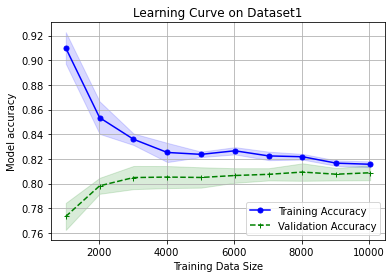

In [17]:
#plot learning curve
pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10))

train_sizes, train_scores, valid_scores,fit_times,score_times = learning_curve(pipeline, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5,n_jobs=1,scoring = 'accuracy',return_times = True)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.title('Learning Curve on Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

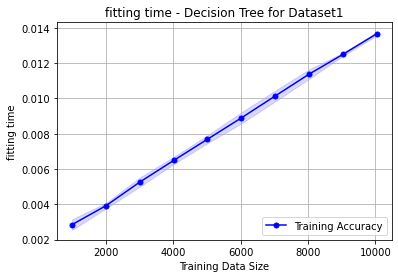

In [18]:
fit_time_avg =  np.mean(fit_times, axis=1)
fit_time_std =  np.std(fit_times, axis=1)

plt.plot(train_sizes, fit_time_avg , color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, fit_time_avg  + fit_time_std, fit_time_avg  - fit_time_std, alpha=0.15, color='blue')
plt.title('fitting time - Decision Tree for Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('fitting time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# KNN

In [ ]:
parameter_range = np.arange(1, 30, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X_train,y_train,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")

In [ ]:
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(parameter_range, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(parameter_range, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(parameter_range, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier on Dataset1")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

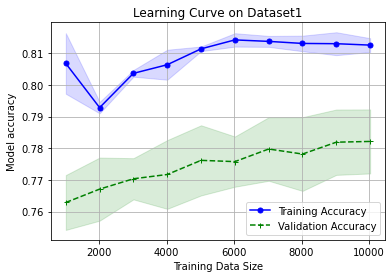

In [10]:
pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=12))
train_sizes, train_scores, valid_scores,fit_times,score_times = learning_curve(pipeline, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5,n_jobs=1,scoring = 'accuracy',return_times = True)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.title('Learning Curve on Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

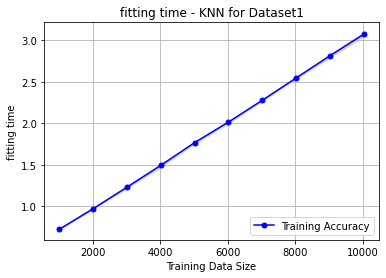

In [13]:
fit_time_avg =  np.mean(fit_times, axis=1)
fit_time_std =  np.std(fit_times, axis=1)

plt.plot(train_sizes, fit_time_avg , color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, fit_time_avg  + fit_time_std, fit_time_avg  - fit_time_std, alpha=0.15, color='blue')
plt.title('fitting time - KNN for Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('fitting time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Boosting

In [ ]:
param_grid = {'n_estimators':[10,30,100,300,1000],
              'learning_rate':[0.001,0.003,0.01,0.03,0.1,0.3]}

search_fit = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, 
                      scoring='accuracy', n_jobs=-1)
search_fit.fit(X_train, y_train)
print(search_fit.best_estimator_, search_fit.best_score_)

In [ ]:
#plot validation curve
n_estimators = [10,30,100,300,1000]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(AdaBoostClassifier(), X_train,y_train,
                                       param_name = "n_estimators",
                                       param_range = n_estimators,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(n_estimators, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(n_estimators, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(n_estimators, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(n_estimators, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with Adaboost Classifier on Dataset1")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#plot validation curve
learning_rate=[0.001,0.003,0.01,0.03,0.1,0.3]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(AdaBoostClassifier(), X_train,y_train,
                                       param_name = "learning_rate",
                                       param_range = learning_rate,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(learning_rate, mean_train_score,label = "Training Score", color = 'blue',marker='o', markersize=5)
plt.fill_between(learning_rate, mean_train_score + std_train_score, mean_train_score - std_train_score,alpha=0.15, color='blue')
plt.plot(learning_rate, mean_test_score,label = "Cross Validation Score", color = 'green',marker='o', markersize=5)
plt.fill_between(learning_rate, mean_test_score + std_test_score, mean_test_score - std_test_score,alpha=0.15, color='green')
 
# Creating the plot
plt.title("Validation Curve with Adaboost Classifier on Dataset1")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

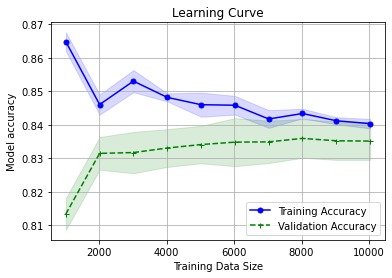

In [12]:
#plot learning curve
pipeline = make_pipeline(StandardScaler(),AdaBoostClassifier(learning_rate=0.3, n_estimators=1000))

train_sizes, train_scores, valid_scores,fit_times,score_times = learning_curve(pipeline, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5,n_jobs=1,scoring = 'accuracy',return_times = True)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

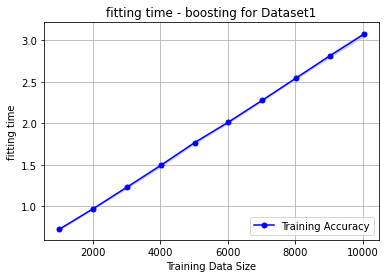

In [14]:
fit_time_avg =  np.mean(fit_times, axis=1)
fit_time_std =  np.std(fit_times, axis=1)

plt.plot(train_sizes, fit_time_avg , color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, fit_time_avg  + fit_time_std, fit_time_avg  - fit_time_std, alpha=0.15, color='blue')
plt.title('fitting time - boosting for Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('fitting time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Neural Network

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(5, ), random_state=10, max_iter=2000)

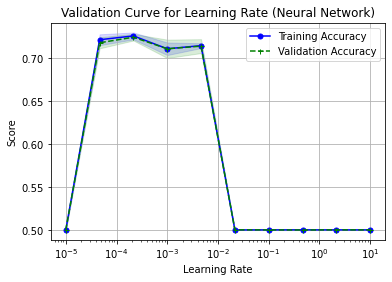

In [39]:
train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=np.logspace(-5,1,10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(test_scores, axis=1)
valid_std = np.std(test_scores, axis=1)

plt.figure()

plt.semilogx(np.logspace(-5,1,10), train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(np.logspace(-5,1,10), train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.semilogx(np.logspace(-5,1,10), valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(np.logspace(-5,1,10), valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')

plt.legend()
plt.title("Validation Curve for Learning Rate (Neural Network)")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.grid()
plt.show()

In [40]:
batch_size = [8,16,32,64,128,256,512]
train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="batch_size", param_range=batch_size, cv=5)

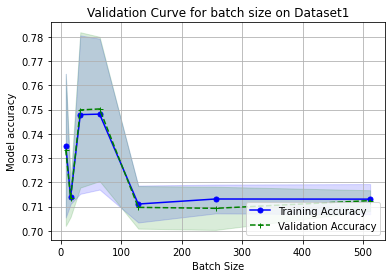

In [41]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(test_scores, axis=1)
valid_std = np.std(test_scores, axis=1)

plt.plot(batch_size, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(batch_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(batch_size, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(batch_size, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.title('Validation Curve for batch size on Dataset1')
plt.xlabel('Batch Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

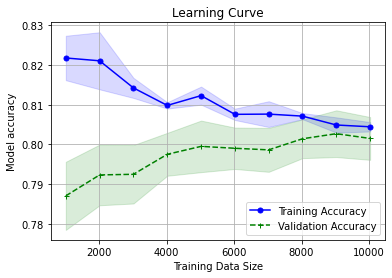

In [15]:
#plot learning curve
pipeline = make_pipeline(StandardScaler(),MLPClassifier(hidden_layer_sizes=(5, ), random_state=10, max_iter=2000,learning_rate_init = 0.001,batch_size =32))

#mlp = MLPClassifier(hidden_layer_sizes=(5, ), random_state=10, max_iter=2000)
train_sizes, train_scores, valid_scores,fit_times,score_times = learning_curve(pipeline, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5,n_jobs=1,scoring = 'accuracy',return_times = True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

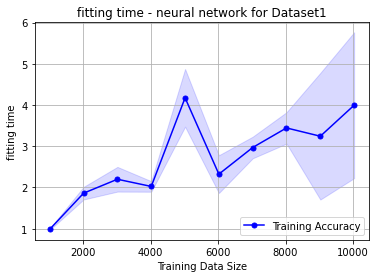

In [16]:
fit_time_avg =  np.mean(fit_times, axis=1)
fit_time_std =  np.std(fit_times, axis=1)

plt.plot(train_sizes, fit_time_avg , color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, fit_time_avg  + fit_time_std, fit_time_avg  - fit_time_std, alpha=0.15, color='blue')
plt.title('fitting time - neural network for Dataset1')
plt.xlabel('Training Data Size')
plt.ylabel('fitting time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [43]:
#mlp = MLPClassifier(hidden_layer_sizes=(5, ), random_state=11, max_iter=10,learning_rate_init = 0.001,batch_size =32,warm_start=True)
pipeline = make_pipeline(StandardScaler(),MLPClassifier(hidden_layer_sizes=(5, ), random_state=10, max_iter=1,learning_rate_init = 0.001,batch_size =32,warm_start=True))
epochs = 300
loss_training = np.zeros(epochs)
loss_test = np.zeros(epochs)
accuracy_train = np.zeros(epochs)
accuracy_test = np.zeros(epochs)


for epoch in range(epochs):
    pipeline.fit(X_train, y_train)
    
    loss_training[epoch] = log_loss(y_train, pipeline.predict(X_train))

/Users/yuqixuan11/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


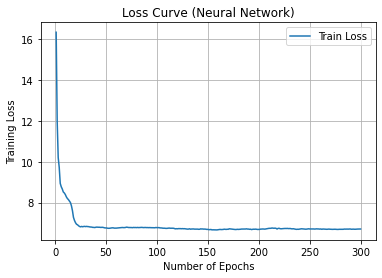

In [44]:
plt.figure()
plt.plot(np.arange(epochs)+1, loss_training, label='Train Loss')
# plt.plot(np.arange(epochs)+1, loss_test, label='Test loss')
# plt.plot(np.arange(epochs)+1, accuracy_train, label='accuracy_train')
# plt.plot(np.arange(epochs)+1, accuracy_test, label='accuracy_test')
plt.legend()
plt.title("Loss Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.savefig('rice_neural_network_loss_curve.png')
plt.show()